# House Price Prediction

##### LOAD THE DATA

In [1]:
import pandas as pd
import numpy as np

header = ['CRIM','ZN','INDUS','CHAS','NOX',
          'RM','AGE','DIS','RAD','TAX','PTRATIO',
          'B','LSTST','MEDV']

X = pd.read_csv('../../../data/housing.data', names=header, sep='\s+', header=None)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### DATA OVERVIEW

In [2]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### APPLY STANDARIZATION AND VISUALIZE THE RELATIONSHIP AMOUNG SOME FEATURES

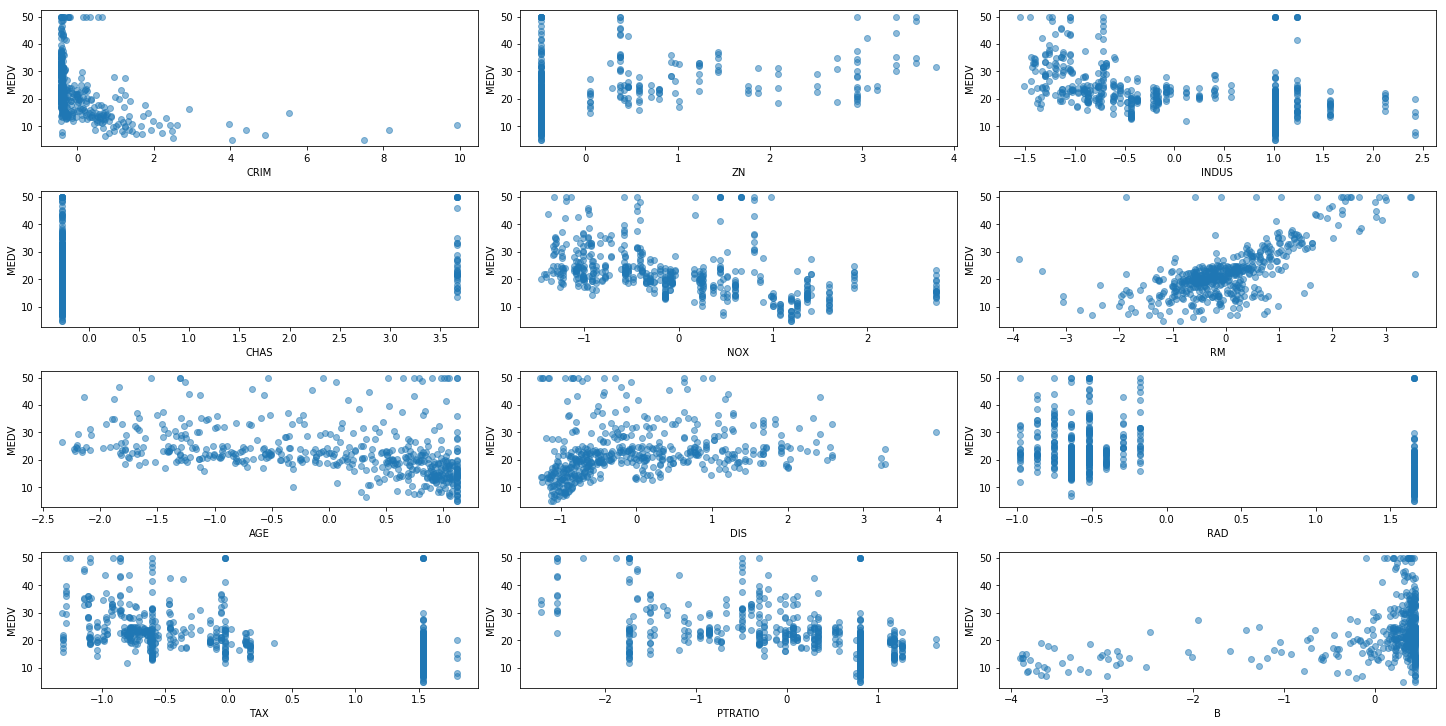

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# separate feature data and target
Y = X['MEDV'].copy()
X = X.drop(columns=['MEDV'])


# apply standarization to the feature dat
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)


#m_scaler = MinMaxScaler(feature_range=(-1,1))
#m_scaler = m_scaler.fit(X)
#X[:] = m_scaler.transform(X)


# plot with various axes scales
rows = 4 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], Y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('MEDV')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

X.describe()

##### SPLIT THE DATA

In [4]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

print ("Shape of (X_train, X_test, y_train, y_test)")
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of (X_train, X_test, y_train, y_test)
(404, 13) (102, 13) (404,) (102,)


##### DEFINE NETWORK PARAMETERS

In [5]:
# define number of attributes
n_features = X_train.shape[1]
n_target = 1  # quantitative data

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features # 12 neurons in input layer
n_layer_h1 = 5          # first  hidden layer
n_layer_h2 = 5          # second hidden layer
n_layer_out = n_target  # 1 neurons in output layer

sigma_init = 0.01   # For randomized initialization

In [6]:
import tensorflow as tf

# this will set up a specific seed in order to control the output 
# and get more homogeneous results though every model variation
def reset_graph(seed=127):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()

In [7]:
# create symbolic variables
X = tf.placeholder(tf.float32, [None, n_layer_in], name="input")
Y = tf.placeholder(tf.float32, [None, n_layer_out], name="output")

# deploy the variables that will store the weights
W = {
    'W1': tf.Variable(tf.random_normal([n_layer_in, n_layer_h1], stddev = sigma_init), name='W1'),
    'W2': tf.Variable(tf.random_normal([n_layer_h1, n_layer_h2], stddev = sigma_init), name='W2'),
    'W3': tf.Variable(tf.random_normal([n_layer_h2, n_layer_out], stddev = sigma_init), name='W3')
}

# deploy the variables that will store the bias
b = {
    'b1': tf.Variable(tf.random_normal([n_layer_h1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([n_layer_h2]), name='b2'),
    'b3': tf.Variable(tf.random_normal([n_layer_out]), name='b3')
}

# this will create the model architecture and output the result
def model_MLP(_X, _W, _b):
    with tf.name_scope('hidden_1'):
        layer_h1 = tf.nn.selu(tf.add(tf.matmul(_X,_W['W1']), _b['b1']))
    with tf.name_scope('hidden_2'):
        layer_h2 = tf.nn.selu(tf.add(tf.matmul(layer_h1,_W['W2']), _b['b2']))
    with tf.name_scope('layer_output'):
        layer_out = tf.add(tf.matmul(layer_h2,_W['W3']), _b['b3'])
        return layer_out

with tf.name_scope("MLP"):
    y_pred = model_MLP(X, W, b)

In [8]:
learning_rate = 0.4

with tf.name_scope("loss"):
    loss = tf.square(Y - y_pred)
    loss = tf.reduce_mean(loss, name='MSE')
    
with tf.name_scope("train"):
    optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)


In [9]:
from datetime import datetime

# define some parameters
n_epochs = 70
display_epoch = 1
batch_size = 10
n_batches = int(n_train/batch_size)

# store the results through every epoch iteration
mse_train_list = []
mse_test_list = []
prediction_results = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(n_epochs):
        index = list(X_train.index.values)
        lower_bound = 0
        for i in range(n_batches):
            # create batches
            batch_index = index[lower_bound:(lower_bound+batch_size)]
            lower_bound += batch_size
            X_batch = X_train.loc[batch_index, :]
            y_batch = y_train[batch_index].values.reshape(-1,1)
            
            # improve the model
            trainer = sess.run([training_op], feed_dict={X:X_batch, Y:y_batch})
            
        # measure performance and display the results
        if (epoch+1) % display_epoch == 0:
            _mse_train = sess.run(loss, feed_dict={X: X_train, Y: y_train.values.reshape(-1,1)})
            _mse_test = sess.run(loss, feed_dict={X: X_test, Y: y_test.values.reshape(-1,1)})
            mse_train_list.append(_mse_train); mse_test_list.append(_mse_test)
            
            print("Epoch: {:04}\tTrainMSE: {:06.5f}\tTestMSE: {:06.5f}".format((epoch+1),_mse_train,_mse_test))
            
    # store the predictuve values
    prediction_results = sess.run(y_pred, feed_dict={X: X_test, Y: y_test.values.reshape(-1,1)})
    predictions = sess.run(y_pred, feed_dict={X: X_test, Y: y_test.values.reshape(-1,1)})
    
    # output comparative table
    dataframe = pd.DataFrame(predictions, columns=['Prediction'])
    dataframe['Target'] = y_test.values
    dataframe['Difference'] = dataframe.Target - dataframe.Prediction
    print('\nPrinting results :\n\n', dataframe)

Epoch: 0001	TrainMSE: 598.39984	TestMSE: 547.49182
Epoch: 0002	TrainMSE: 596.31891	TestMSE: 545.53552
Epoch: 0003	TrainMSE: 593.30090	TestMSE: 542.72015
Epoch: 0004	TrainMSE: 585.24237	TestMSE: 535.36804
Epoch: 0005	TrainMSE: 468.21902	TestMSE: 429.23080
Epoch: 0006	TrainMSE: 37.93715	TestMSE: 36.45712
Epoch: 0007	TrainMSE: 25.91278	TestMSE: 25.00190
Epoch: 0008	TrainMSE: 22.81586	TestMSE: 22.22586
Epoch: 0009	TrainMSE: 21.66375	TestMSE: 21.34037
Epoch: 0010	TrainMSE: 20.97759	TestMSE: 20.46036
Epoch: 0011	TrainMSE: 20.48220	TestMSE: 19.72251
Epoch: 0012	TrainMSE: 20.06073	TestMSE: 19.01561
Epoch: 0013	TrainMSE: 19.69123	TestMSE: 18.35877
Epoch: 0014	TrainMSE: 19.36615	TestMSE: 17.77252
Epoch: 0015	TrainMSE: 19.06252	TestMSE: 17.27200
Epoch: 0016	TrainMSE: 18.76688	TestMSE: 16.84092
Epoch: 0017	TrainMSE: 18.55527	TestMSE: 16.55572
Epoch: 0018	TrainMSE: 18.39671	TestMSE: 16.35933
Epoch: 0019	TrainMSE: 18.26817	TestMSE: 16.18903
Epoch: 0020	TrainMSE: 18.16474	TestMSE: 16.08003
Epoch: 002